Safety Net
---
Test pull - GeoapI

In [ ]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
from matplotlib.patches import Polygon
import requests
import numpy as np
import json
import requests

# Import API key
from api_keys import geoapify_key


In [3]:
sf_orig_clean = Path("SF_Crime_Data_from_2018_to_Present_CLEANED.csv")
sf_orig_df = pd.read_csv(sf_orig_clean)
sf_orig_df


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Police District,Analysis Neighborhood,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
0,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
1,10/13/23 23:50,10/13/23,11:50:00 PM,2023,Friday,10/13/23 23:50,1.330000e+11,1327919,230729452,232853587.0,...,Bayview,Bayview Hunters Point,10.0,37.721600,-122.390745,POINT (-122.39074534279013 37.72159985216247),0.0,0.0,9.0,2.0
2,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
3,10/13/23 20:40,10/13/23,8:40:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328218,230736946,232863345.0,...,Southern,South of Market,6.0,37.773769,-122.411610,POINT (-122.41161011784295 37.773769345456756),1.0,1.0,10.0,1.0
4,10/13/23 20:37,10/13/23,8:37:00 PM,2023,Friday,10/13/23 20:49,1.330000e+11,1328221,230736924,232863318.0,...,Bayview,Bayview Hunters Point,10.0,37.729543,-122.386419,POINT (-122.38641847685011 37.72954271057539),0.0,0.0,9.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
731420,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,9/29/20 12:29,9.653111e+10,965311,200586298,202731493.0,...,Northern,Western Addition,2.0,37.788280,-122.423594,POINT (-122.42359407328958 37.78827973195545),0.0,0.0,6.0,4.0
731421,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,7/14/20 13:57,9.436317e+10,943631,200421296,201961703.0,...,Tenderloin,Tenderloin,6.0,37.778719,-122.414741,POINT (-122.4147412230519 37.77871942789032),1.0,1.0,10.0,5.0
731422,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,11/20/20 14:21,9.803191e+10,980319,200701703,203251939.0,...,Northern,Marina,2.0,37.803727,-122.428400,POINT (-122.42840027589088 37.80372712877811),0.0,0.0,6.0,4.0
731423,1/1/18 0:00,1/1/18,12:00:00 AM,2018,Monday,5/28/21 12:57,1.030000e+11,1034762,210329436,211481637.0,...,Taraval,Oceanview/Merced/Ingleside,11.0,37.721659,-122.467615,POINT (-122.46761532399763 37.72165880704187),0.0,0.0,1.0,10.0


In [4]:
#count total number of neighborhoods:
sf_orig_df['Analysis Neighborhood'].nunique()

41

In [5]:
#group by 1 variable
#counting total number of incidents by neighborhood
#counting total number of incidents by neighborhood
sf_by_neighborhood_ct=pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_neighborhood_ct


,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870,...,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870
Bernal Heights,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951,...,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951
Castro/Upper Market,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392,...,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392
Chinatown,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657,...,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657
Excelsior,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676,...,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676
Financial District/South Beach,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925,...,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925
Glen Park,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199,...,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199
Golden Gate Park,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797,...,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797
Haight Ashbury,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246,...,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246


In [6]:
#grouping total number of incidents per year
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort=sf_by_year_ct.sort_values('Incident Datetime',ascending = True)[['Incident Datetime','Incident Year']][:15]
df_sort

,Incident Datetime,Incident Year
Analysis Neighborhood,,
McLaren Park,938,938
Seacliff,1046,1046
Presidio,1048,1048
Lincoln Park,1238,1238
Treasure Island,2659,2659
Twin Peaks,3814,3814
Glen Park,4199,4199
Presidio Heights,4824,4824
Japantown,7739,7739


In [8]:
#group by 2variables
#counting total number of incidents by neighborhood, by year
sf_neigh_yr = pd.DataFrame(sf_orig_df.groupby(['Analysis Neighborhood','Incident Year']).count())
new= sf_orig_df.sort_values(by = ['Analysis Neighborhood','Incident Year'])
df_index=sf_neigh_yr.reset_index()
df=df_index.set_index('Incident Year')
df

,Analysis Neighborhood,Incident Datetime,Incident Date,Incident Time,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Incident Year,,,,,,,,,,,,,,,,,,,,,
2018,Bayview Hunters Point,7922,7922,7922,7922,7922,7922,7922,7922,7922,...,7922,7922,7922,7922,7922,7922,7922,7922,7922,7922
2019,Bayview Hunters Point,8076,8076,8076,8076,8076,8076,8076,8076,8076,...,8076,8076,8076,8076,8076,8076,8076,8076,8076,8076
2020,Bayview Hunters Point,7874,7874,7874,7874,7874,7874,7874,7874,7874,...,7874,7874,7874,7874,7874,7874,7874,7874,7874,7874
2021,Bayview Hunters Point,8982,8982,8982,8982,8982,8982,8982,8982,8982,...,8982,8982,8982,8982,8982,8982,8982,8982,8982,8982
2022,Bayview Hunters Point,8903,8903,8903,8903,8903,8903,8903,8903,8903,...,8903,8903,8903,8903,8903,8903,8903,8903,8903,8903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,Western Addition,4706,4706,4706,4706,4706,4706,4706,4706,4706,...,4706,4706,4706,4706,4706,4706,4706,4706,4706,4706
2020,Western Addition,3663,3663,3663,3663,3663,3663,3663,3663,3663,...,3663,3663,3663,3663,3663,3663,3663,3663,3663,3663
2021,Western Addition,3537,3537,3537,3537,3537,3537,3537,3537,3537,...,3537,3537,3537,3537,3537,3537,3537,3537,3537,3537


In [9]:
#grouping total number of incidents per year
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
sf_by_year_ct.sort_values('Incident Datetime',ascending = False)
sf_by_year_ct

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Resolution,Police District,Supervisor District,Latitude,Longitude,Point,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Current Supervisor Districts,Current Police Districts
Analysis Neighborhood,,,,,,,,,,,,,,,,,,,,,
Bayview Hunters Point,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870,...,48870,48870,48870,48870,48870,48870,48870,48870,48870,48870
Bernal Heights,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951,...,13951,13951,13951,13951,13951,13951,13951,13951,13951,13951
Castro/Upper Market,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392,...,21392,21392,21392,21392,21392,21392,21392,21392,21392,21392
Chinatown,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657,...,12657,12657,12657,12657,12657,12657,12657,12657,12657,12657
Excelsior,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676,...,12676,12676,12676,12676,12676,12676,12676,12676,12676,12676
Financial District/South Beach,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925,...,58925,58925,58925,58925,58925,58925,58925,58925,58925,58925
Glen Park,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199,...,4199,4199,4199,4199,4199,4199,4199,4199,4199,4199
Golden Gate Park,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797,...,7797,7797,7797,7797,7797,7797,7797,7797,7797,7797
Haight Ashbury,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246,...,12246,12246,12246,12246,12246,12246,12246,12246,12246,12246


In [10]:
df_sort.index

Index(['McLaren Park', 'Seacliff', 'Presidio', 'Lincoln Park',
       'Treasure Island', 'Twin Peaks', 'Glen Park', 'Presidio Heights',
       'Japantown', 'Golden Gate Park', 'Oceanview/Merced/Ingleside',
       'Visitacion Valley', 'Noe Valley', 'Portola', 'Lone Mountain/USF'],
      dtype='object', name='Analysis Neighborhood')

In [11]:
#grouping total number of incidents per year
sf_by_year_ct= pd.DataFrame(sf_orig_df.groupby('Analysis Neighborhood').count())
df_sort=sf_by_year_ct.sort_values('Incident Datetime',ascending = False)[['Incident Datetime','Incident Year']][:15]
df_sort

,Incident Datetime,Incident Year
Analysis Neighborhood,,
Mission,78169,78169
Tenderloin,75445,75445
South of Market,59888,59888
Financial District/South Beach,58925,58925
Bayview Hunters Point,48870,48870
North Beach,25036,25036
Western Addition,23871,23871
Sunset/Parkside,21876,21876
Castro/Upper Market,21392,21392


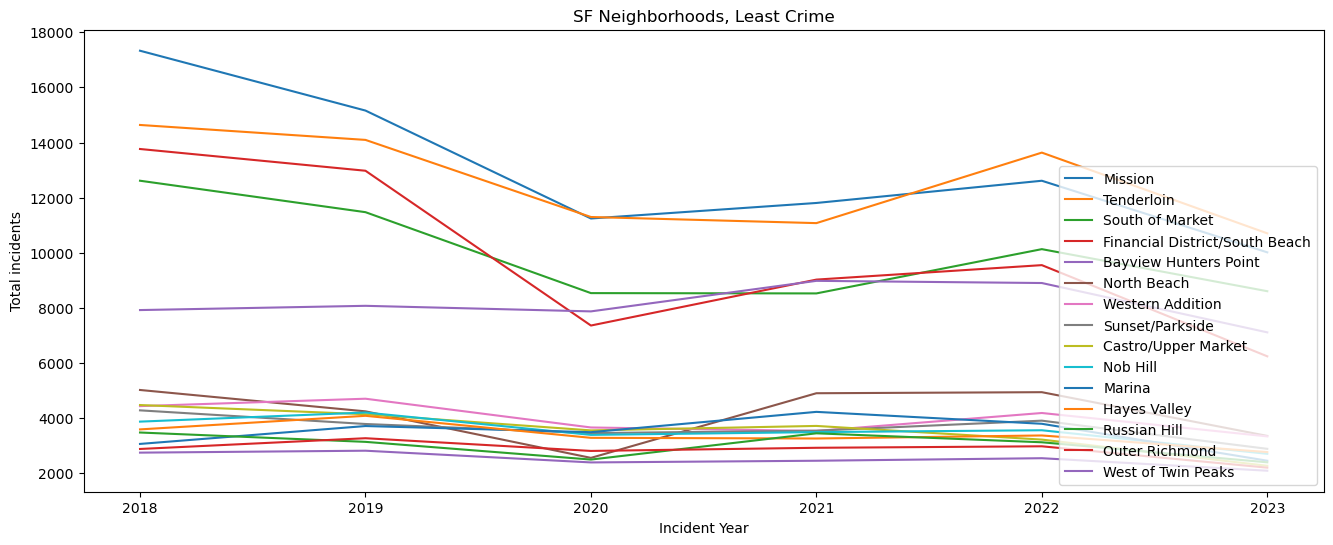

In [14]:
for neigh in df_sort.index:
    
    df[df['Analysis Neighborhood']==neigh].Latitude.plot(figsize=[16,6], 
        title='SF Neighborhoods, Least Crime')
    plt.ylabel('Total incidents')
    plt.legend(df_sort.index,loc='lower right')